# Supervised learning met decision trees
### K. Verbeeck, T. Vermeulen, J. Maervoet
Data Science (Theory) -- OGI02i

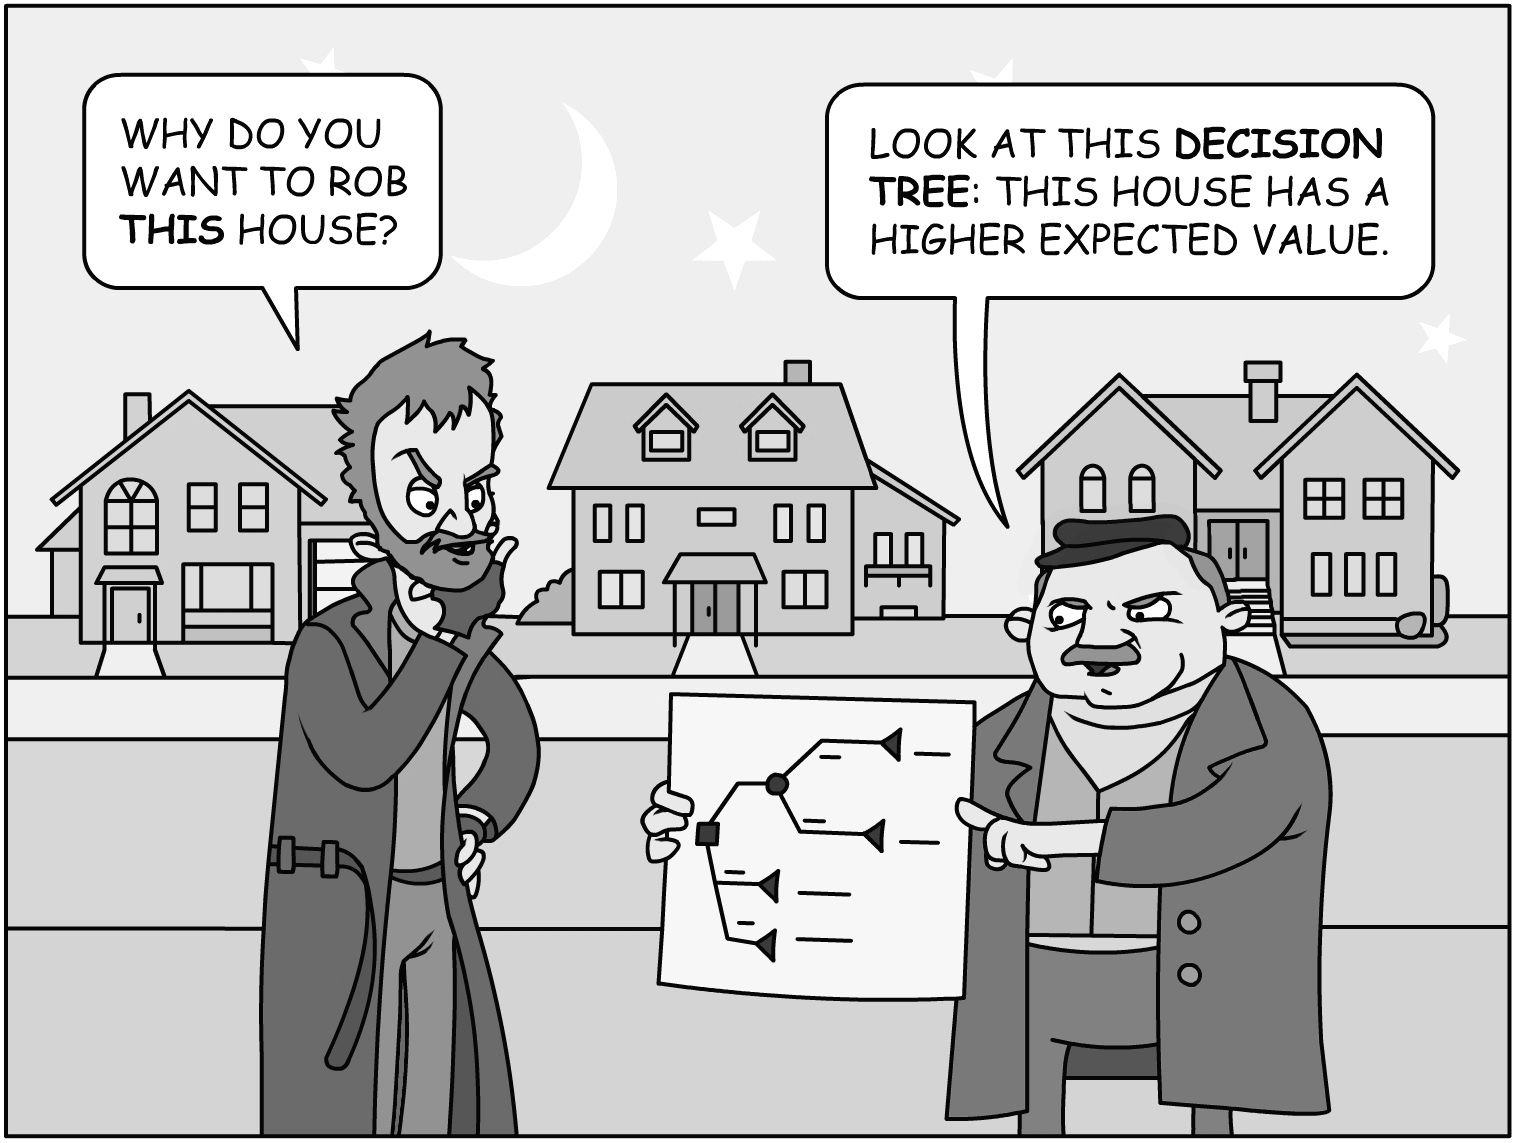
Classificatie of regressie?

### Recap: Supervised Machine Learning

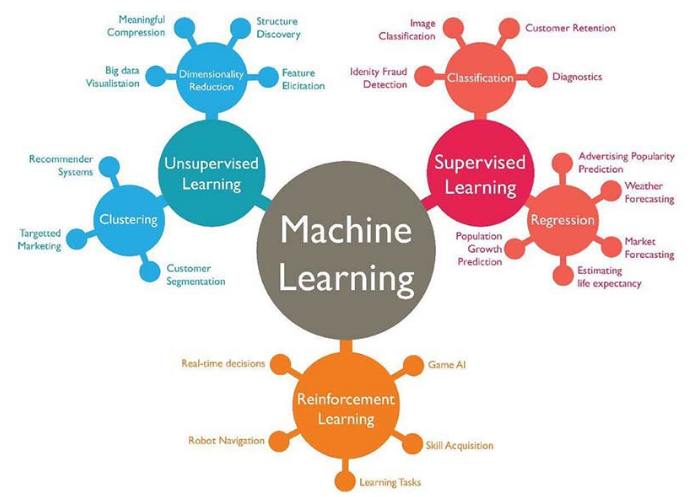

### Decision tree (beslissingboom)

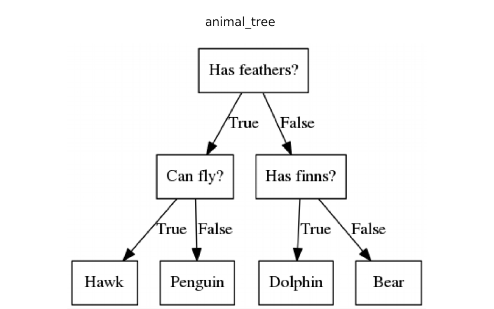

* Datastructuur: hiërarchie van if-else-vragen die leiden tot een beslissing
* Deze les: algoritmen voor classificatie en regressie die dit soort modellen leren

* Vragen in de boom: _tests_
* Typische vorm bij continue features: __feature &leq; waarde__

### Een voorbeeld met classificatie

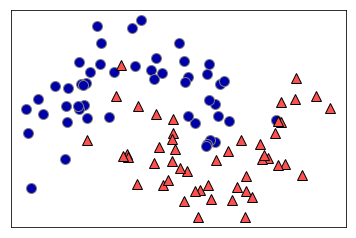

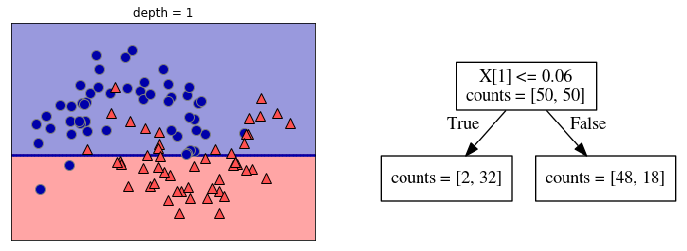

### Intermezzo

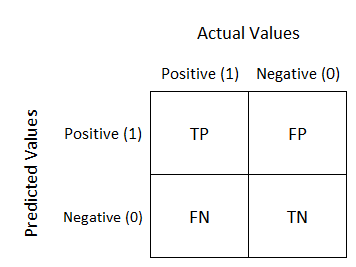

$accuracy = \frac{aantal\,correcte\,voorspellingen}{totaal\,aantal\,voorspellingen}$

$accuracy = \frac{TP + TN}{TP + FP + TN + FN}$

Andere maten: ["Classification accuracy is not enough"](https://machinelearningmastery.com/classification-accuracy-is-not-enough-more-performance-measures-you-can-use/)

### Een voorbeeld met classificatie

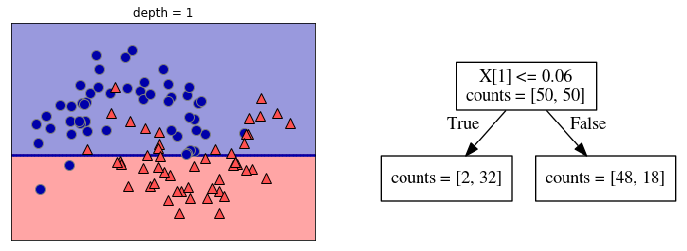

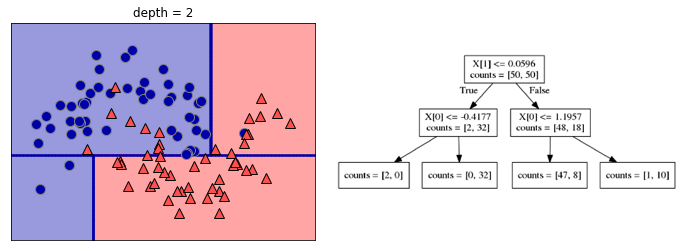

### Een voorbeeld met classificatie

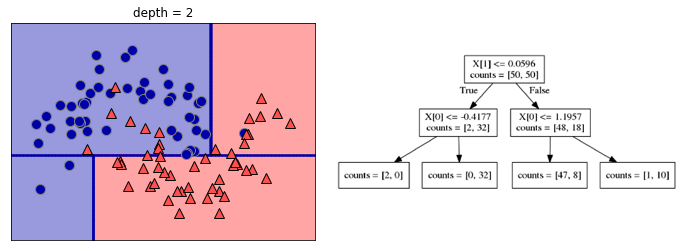

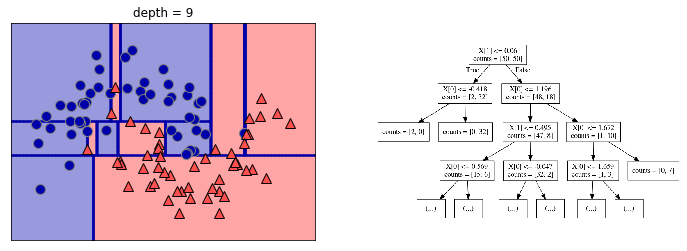

#### Decision trees leren tot accuracy 100%: een goed idee?
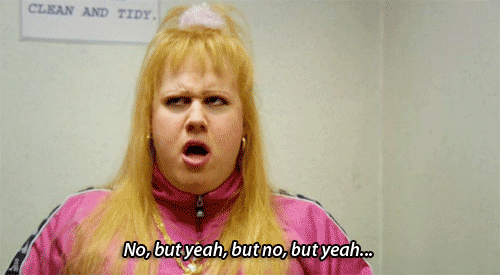
meer hierover straks &hellip;

### scikit-learn: DecisionTreeClassifier
zowel voor binaire classificatie (targets -1 en 1) als multiclass (targets 0, &hellip;, K-1)

In [1]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

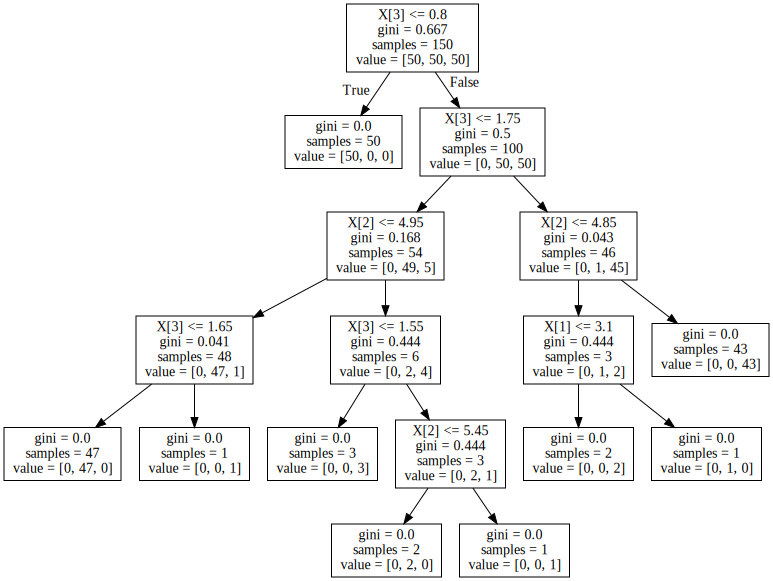

In [2]:
import graphviz # python-graphviz te installeren via (Ana)conda
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 
graph

Gini impurity: aandeel van random guesses dat incorrect zou worden geclassificeerd

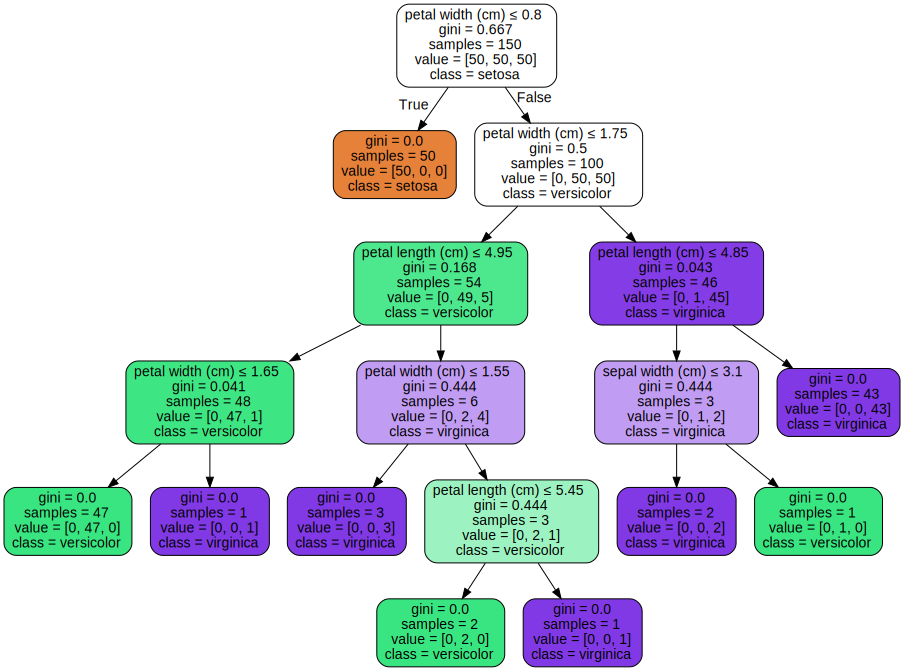

In [4]:
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=iris.feature_names,  class_names=iris.target_names, filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

#### Beheersen van de complexiteit van decision trees

2 technieken
 * op tijd stoppen (_pre-pruning_); voorbeelden criteria
   * max. diepte
   * max. aantal leaves
   * min. aantal instanties in een node
 * pruning: achteraf wegknippen takken (_post-pruning_)
 
DecisionTreeClassifier doet aan "pre-pruning", kijk eens naar de __[parameters](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)__

#### Beheersen van de complexiteit van decision trees: voorbeeld

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split


cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [6]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


### De _feature importance_ in een tree onderzoeken
~ in welke mate draagt een feature bij tot het maken van de juiste beslissing voor de data-instanties?

In [7]:
print("Feature importances:")
print(tree.feature_importances_)

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


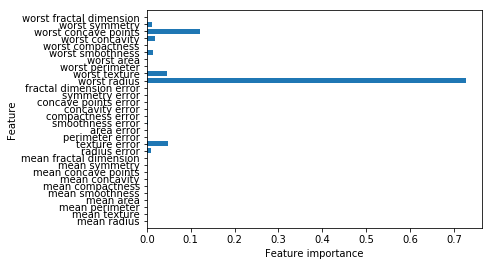

In [17]:
import matplotlib.pyplot as plt
import numpy as np
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

### Opgelet

De feature importance zegt niet noodzakelijk iets over hoe indicatief een bepaalde feature in het algemeen is voor een bepaald classificatieprobleem
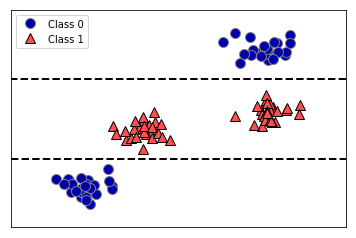

### En hoe werkt het nu met regressie ?

Zeer gelijkaardig. 
 * Scikit-klasse: _DecisionTreeRegressor_
 * Alles wat we tot hiertoe gezegd hebben over de trees, de beheersing van de complexiteit en de feature importance geldt ook voor regressie

#### Een voorbeeld op een toy problem &hellip;

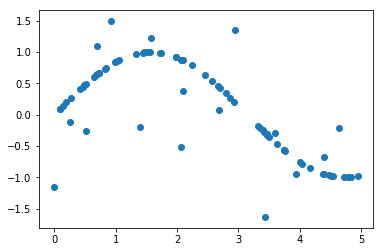

In [9]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

plt.figure()
plt.scatter(X, y)
plt.show()

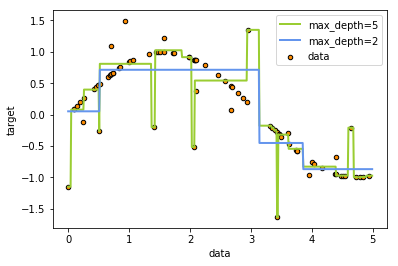

In [10]:
from sklearn.tree import DecisionTreeRegressor

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.legend()
plt.show()

### Conclusie (klassieke) decision trees

* Parameters van decision trees: (pre-)pruning parameters die complexiteit moeten beheersen om overfitting tegen te gaan
* Mooie visualiseerbare modellen, ook te begrijpen door niet-experten
* Werkt volledig onafhankelijk van de schaal van de features

Nadelen:
* Snel overfitting, ondanks pruning
* Op bepaalde problemen is het model niet flexibel genoeg &rarr; hoge bias (door verkeerde assumpties)


### Random forests

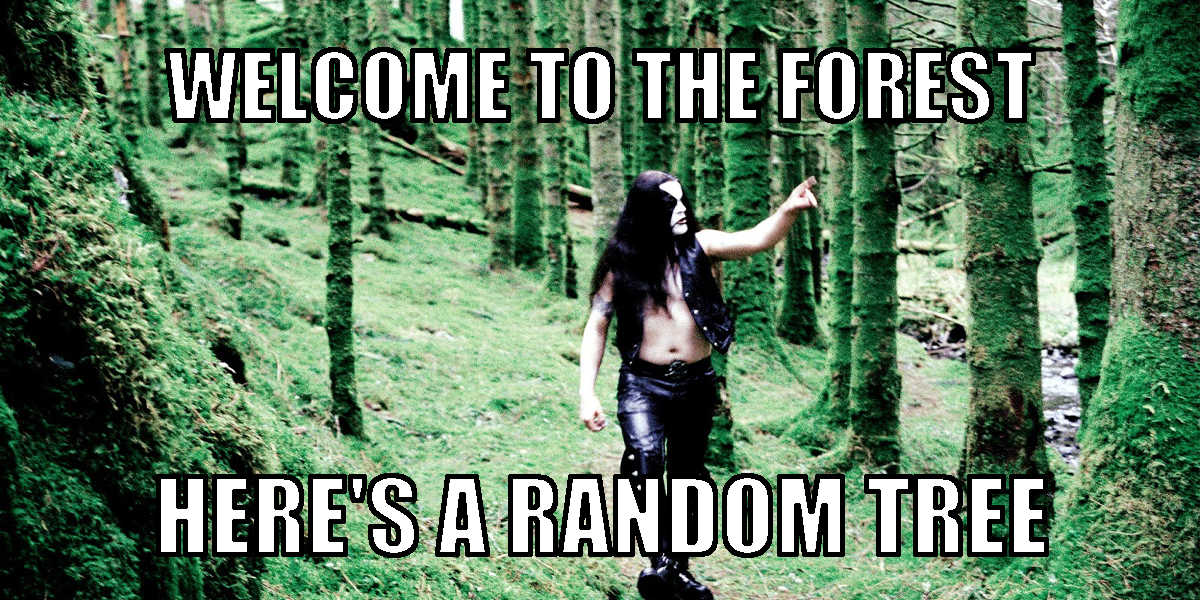

### Random forests

* random forest = een verzameling decision trees
* uitgangspunt: elke tree doet goede voorspellingen maar loopt het risico op overfitting op een deel van de data
* principe:
  * parallel meerdere decision trees opbouwen
  * injecteren van willekeurigheid ('randomness') zodat elke tree verschillend is
  * bij opvragen voorspelling, vragen we een voorspelling aan elke tree
    * regressie: finale voorspelling is gemiddelde van de voorspellingen
    * classificatie: _soft voting_: elke tree geeft bij zijn voorspelling een probabiliteit mee &rarr; klasse met hoogste probabiliteit levert finale voorspelling

### Random forests
  
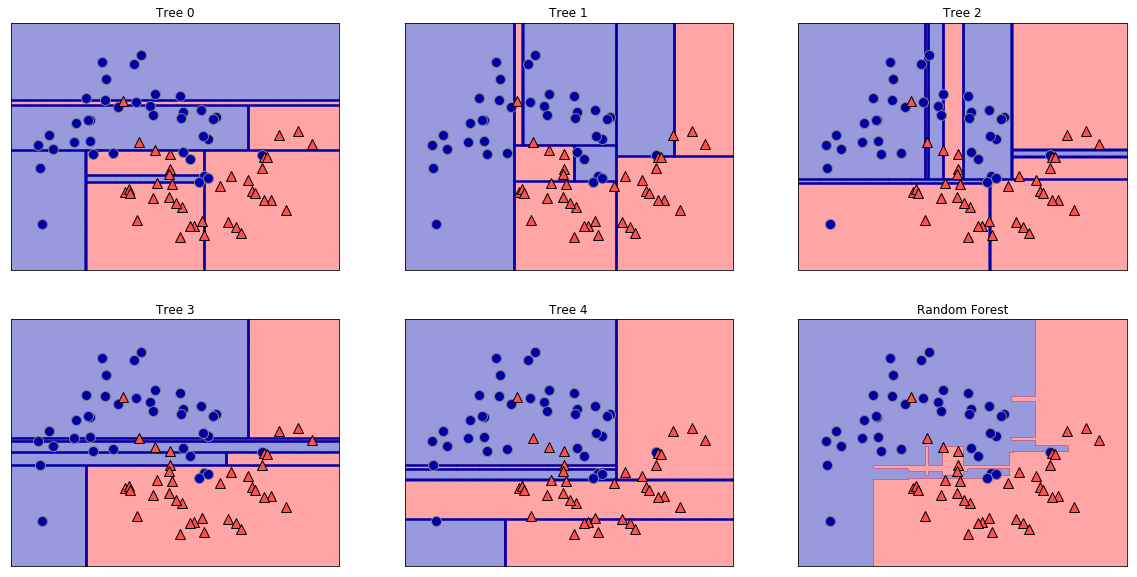

#### Parameters en injecteren van randomness

* __n\_estimators__: aantal trees in de forest
* voor het aanbieden aan een tree: _bootstrappen_ van de data
   * voorbeeldje: ['a', 'b', 'c', 'd'] &rarr; ['b', 'd', 'd', 'c']
* aanpassing algo: bij het bepalen van een test in een node kan er slechts gekozen worden uit een random subset van de features; grootte: __max\_features__
   * opgelet: bij hoge max\_features: te gelijkaardige trees
   * bij lage max\_features: zeer diepe trees nodig om een redelijke accuracy te halen

In [11]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

C:\Users\Joris\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Accuracy on training set: 1.000
Accuracy on test set: 0.972


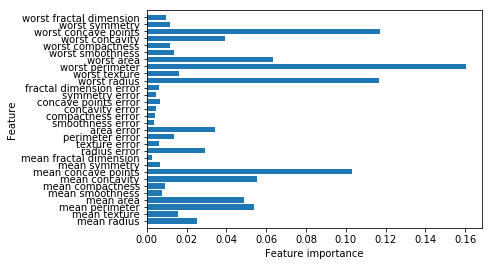

In [12]:
plot_feature_importances_cancer(forest)

### Gradient Boosted Regression Trees (Gradient Boosting Machines)

* andere vorm van tree _ensemble_
* ondanks naam: voor classificatie en regressie
* serieel schakelen van korte trees (diepte 1 tot 5), waarbij een tree de fouten compenseert van de vorige tree
* idee: simpele modellen combineren die het goed doen op een deel van de data; snelle voorspellingen
* doen het zeer goed in de praktijk maar gevoeliger voor parameters
   * aantal trees: __n\_estimators__
   * maximale diepte bomen: __max\_depth__
   * __learning\_rate__: mate waarin boom fouten van vorige boom compenseert
   * __random\_state__
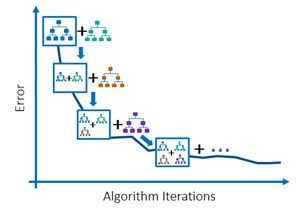

In [13]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.958


In [14]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972


In [15]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.965


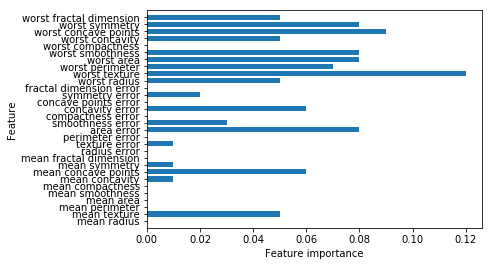

In [16]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

eveneens beter gespreid en sommige features worden totaal genegeerd

### Besluit

* Klassieke decision tree
  * mooie interpreteerbare modellen
  * parameters: typisch voor pruning / complexiteitsbeheersing
  * neiging naar overfitting
  * model heeft heel specifieke assumpties

* Random Forests
  * parallel schakelen van trees
  * generaliseren goed in de praktijk
  
* Gradient boosting machines
  * serieel schakelen van trees
  * typisch moeilijker te tunen dan RF, maar kan wel hogere accuracy opleveren
  * voorspellen sneller dan RF
  * iets meer neiging naar overfitting dan RF



